## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [1]:
# import models and fit
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [2]:
# Import processed data:  

data = pd.read_csv('../processed_data/processed_real_estate_listings.csv')
X = data.drop(columns='sold_price')
y = data['sold_price']

### Linear Regression

In [3]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
lr = LinearRegression()  # Initialize model
lr.fit(lr_X_train, lr_y_train)  # Train the model
lr_pred = lr.predict(lr_X_test)

In [5]:
# Evaluation Metrics 

lr_mse = mean_squared_error(lr_y_test, lr_pred)
lr_r2 = r2_score(lr_y_test, lr_pred)
lr_mae = mean_absolute_error(lr_y_test, lr_pred)

print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.2f}")
print(f"Mean Absolute Error: ${lr_mae:,.2f}")

Mean Squared Error: 44810573769.57
R² Score: 0.44
Mean Absolute Error: $142,510.09


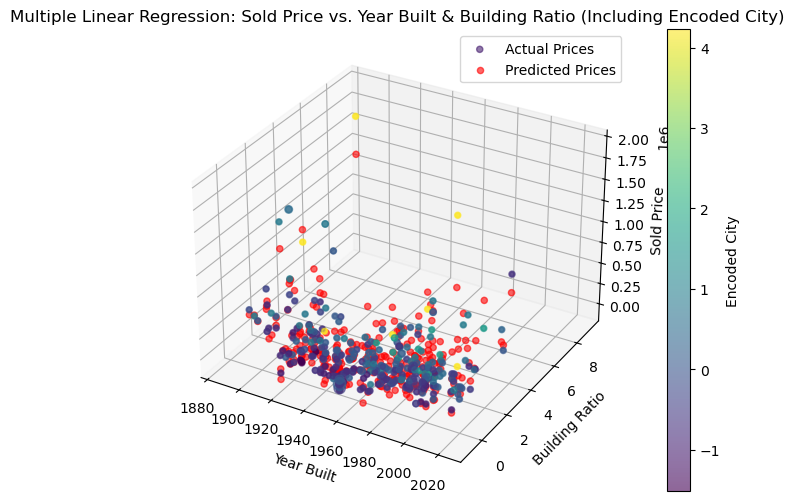

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

# Use encoded_city as the color scale (mapping city values to colors)
colors = lr_X_test["encoded_city"]  # Assign colors based on encoded city values

# Actual Prices
sc = ax.scatter(lr_X_test["year_built"], lr_X_test["building_ratio"], lr_y_test, 
                c=colors, cmap="viridis", label="Actual Prices", alpha=0.6)

# Predicted Prices
ax.scatter(lr_X_test["year_built"], lr_X_test["building_ratio"], lr_pred, 
           color="red", label="Predicted Prices", alpha=0.6)

# Add color bar for encoded_city representation
cbar = fig.colorbar(sc)
cbar.set_label("Encoded City")

# Adjust marker size based on total_sqft for better visualization
marker_sizes = np.interp(lr_X_test["total_sqft"], (lr_X_test["total_sqft"].min(), lr_X_test["total_sqft"].max()), (10, 100))
ax.scatter(lr_X_test["year_built"], lr_X_test["building_ratio"], lr_y_test, 
           c=colors, cmap="viridis", s=marker_sizes, alpha=0.6)

# Label axes
ax.set_xlabel("Year Built")
ax.set_ylabel("Building Ratio")
ax.set_zlabel("Sold Price")
ax.legend()
plt.title("Multiple Linear Regression: Sold Price vs. Year Built & Building Ratio (Including Encoded City)")
plt.show()

### XGBoost

In [7]:
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(xgb_X_train, xgb_y_train)

# Predict sold prices
xgb_pred = xgb_model.predict(xgb_X_test)

In [9]:
# Compute evaluation metrics
mae_xgb = mean_absolute_error(xgb_y_test, xgb_pred)
mse_xgb = mean_squared_error(xgb_y_test, xgb_pred)
rmse_xgb = mse_xgb ** 0.5  # Convert to original units
r2_xgb = r2_score(xgb_y_test, xgb_pred)

print(f"Mean Absolute Error: ${mae_xgb:,.2f}")
print(f"Root Mean Squared Error: ${rmse_xgb:,.2f}")
print(f"R² Score: {r2_xgb:.2f}")

Mean Absolute Error: $124,327.34
Root Mean Squared Error: $221,667.78
R² Score: 0.67


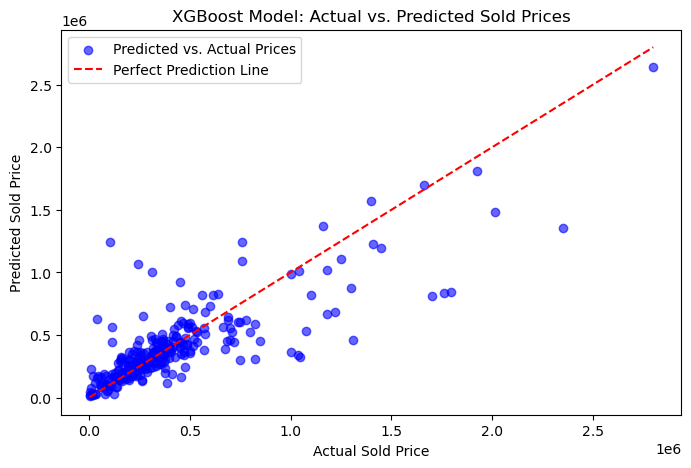

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(xgb_y_test, xgb_pred, alpha=0.6, color="blue", label="Predicted vs. Actual Prices")
plt.plot([xgb_y_test.min(), xgb_y_test.max()], [xgb_y_test.min(), xgb_y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.legend()
plt.title("XGBoost Model: Actual vs. Predicted Sold Prices")
plt.show()

### Random Forest

In [11]:
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [12]:
rfc = RandomForestRegressor(n_estimators=50, random_state=3)
rfc.fit(rf_X_train, rf_y_train)
rf_pred = rfc.predict(rf_X_test)

rf_mae = mean_absolute_error(rf_y_test, rf_pred)
rf_rmse = root_mean_squared_error(rf_y_test, rf_pred)
rf_r2 = r2_score(rf_y_test, rf_pred)

print(f"Mean Absolute Error: ${rf_mae:,.2f}")
print(f"Root Mean Squared Error: ${rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.2f}")

Mean Absolute Error: $102,539.19
Root Mean Squared Error: $189,502.18
R² Score: 0.56


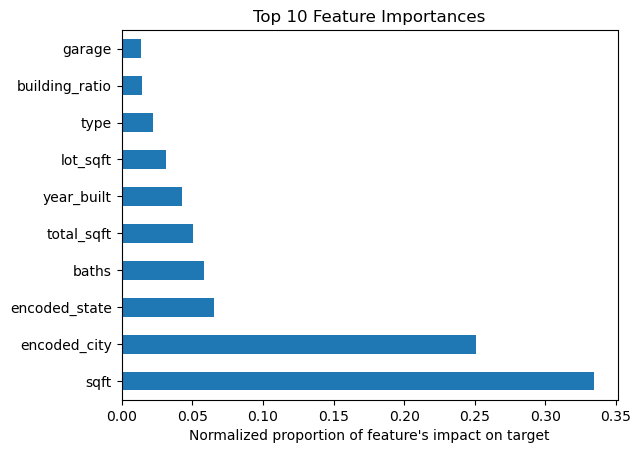

In [13]:
feat_importances = pd.Series(rfc.feature_importances_, index=rf_X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.tight_layout
plt.xlabel('Normalized proportion of feature\'s impact on target')
plt.show()

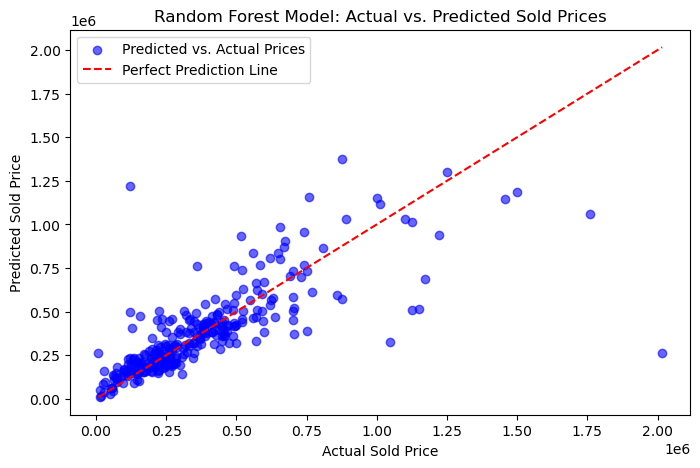

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(rf_y_test, rf_pred, alpha=0.6, color="blue", label="Predicted vs. Actual Prices")
plt.plot([rf_y_test.min(), rf_y_test.max()], [rf_y_test.min(), rf_y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.legend()
plt.title("Random Forest Model: Actual vs. Predicted Sold Prices")
plt.show()

### K-Neighbors Regression

In [15]:
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [16]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

knn_mae = mean_absolute_error(knn_y_test, knn_pred)
knn_rmse = root_mean_squared_error(knn_y_test, knn_pred)
knn_r2 = r2_score(knn_y_test, knn_pred)

print(f"Mean Absolute Error: ${knn_mae:,.2f}")
print(f"Root Mean Squared Error: ${knn_rmse:,.2f}")
print(f"R² Score: {knn_r2:.2f}")

Mean Absolute Error: $154,922.63
Root Mean Squared Error: $260,807.16
R² Score: 0.35


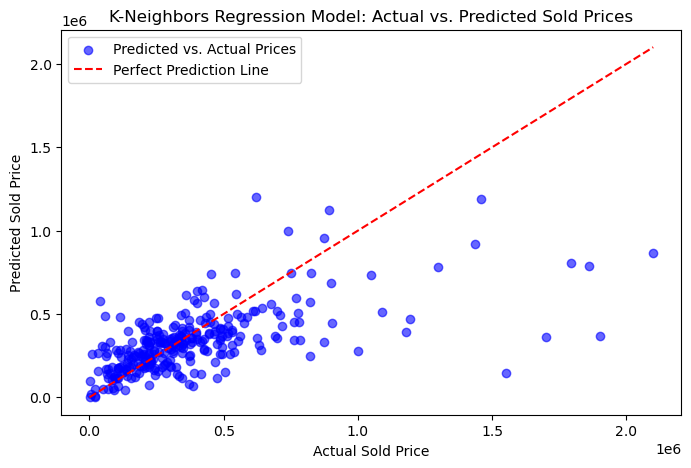

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(knn_y_test, knn_pred, alpha=0.6, color="blue", label="Predicted vs. Actual Prices")
plt.plot([knn_y_test.min(), knn_y_test.max()], [knn_y_test.min(), knn_y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.legend()
plt.title("K-Neighbors Regression Model: Actual vs. Predicted Sold Prices")
plt.show()

### SVR

In [18]:
svr_X_train, svr_X_test, svr_y_train, svr_y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [19]:
svr = SVR(kernel='rbf')
svr.fit(svr_X_train, svr_y_train)
svr_pred = svr.predict(svr_X_test)

svr_rmse = root_mean_squared_error(svr_y_test, svr_pred)
svr_r2 = r2_score(svr_y_test, svr_pred)
mae = mean_absolute_error(svr_y_test, svr_pred)

print(f"Mean Absolute Error: ${knn_mae:,.2f}")
print(f"Root Mean Squared Error: ${knn_rmse:,.2f}")
print(f"R² Score: {knn_r2:.2f}")

Mean Absolute Error: $154,922.63
Root Mean Squared Error: $260,807.16
R² Score: 0.35


In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models and predictions
models = {
    "Linear Regression": (lr_pred, lr_y_test),
    "XGBoost": (xgb_pred, xgb_y_test),
    "Random Forest": (rf_pred, rf_y_test),
    "KNN": (knn_pred, knn_y_test),
    "SVR": (svr_pred, svr_y_test)
}

# Compile evaluation metrics into a dictionary
evaluation_results = {}

for model_name, (pred, y_test) in models.items():
    mse = mean_squared_error(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    n = lr_X_test.shape[0]  # Number of observations
    p = lr_X_test.shape[1]  # Number of predictors
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    evaluation_results[model_name] = [mse, rmse, mae, r2, adjusted_r2]

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(
    evaluation_results, 
    orient="index", 
    columns=["MSE", "RMSE", "MAE", "R² Score", "Adjusted R² Score"]
)

# Print results
results_df

,MSE,RMSE,MAE,R² Score,Adjusted R² Score
Linear Regression,4.481057e+10,211685.081594,142510.087468,0.444839,0.333807
XGBoost,4.913660e+10,221667.779838,124327.344808,0.672802,0.607363
Random Forest,3.591108e+10,189502.178382,102539.192889,0.557824,0.469388
KNN,6.802038e+10,260807.160929,154922.631142,0.350182,0.220218
SVR,1.594577e+11,399321.568837,236989.472253,-0.060029,-0.272034


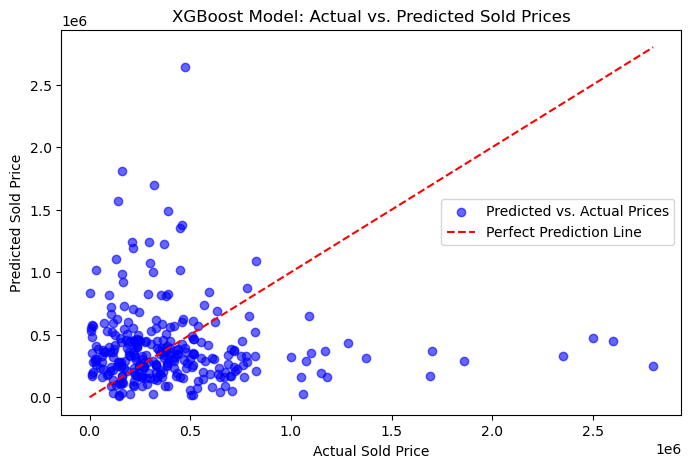

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, xgb_pred, alpha=0.6, color="blue", label="Predicted vs. Actual Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.legend()
plt.title("XGBoost Model: Actual vs. Predicted Sold Prices")
plt.show()

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

The evaluation values that are most important to consider are the Root Mean Square Error, Adjusted R^2, and Mean Absolute Error values. 




MSE calculates the average of squared differences between actual and predicted prices. Because it squares errors, the units become distorted—so it's hard to directly relate the value of MSE to the actual price error. A higher MSE means larger errors, but the squared nature can exaggerate outliers.

RMSE solves the unit issue by taking the square root of MSE, bringing the error back to the same scale as dollars. This makes RMSE more intuitive when comparing how far predictions deviate from actual house prices.

R² shows how well the  model explains the variability in house prices. Higher values mean better predictive power.

Adjusted R² improves on R² by accounting for the number of predictors—preventing misleading improvements when unnecessary features are added.

Reasons for choosing the metrics:

MSE and RMSE are useful for understanding the magnitude of errors but can be sensitive to outliers.

MAE provides a more balanced view of errors.

R² and Adjusted R² help measure how well the model captures house price variations.

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [22]:
# Use RFE to select top 10 features
from sklearn.feature_selection import RFE

rfe = RFE(xgb_model, n_features_to_select=10)
rfe.fit(X, y)
selected_features = (X.columns[rfe.support_]).tolist()
print('Selected Features:', selected_features)

Selected Features: ['baths', 'type', 'sqft', 'central_air', 'community_outdoor_space', 'garage_2_or_more', 'community_security_features', 'farm', 'encoded_city', 'encoded_state']


In [23]:
# Save dataset with selected features and target to csv 

selected_features.append('sold_price')
selected_data = data[selected_features]
selected_data.to_csv(os.path.join('../processed_data', 'feature_selected_data.csv'), index=False)

In [24]:
selected_X = selected_data.drop(columns='sold_price')
selected_y = selected_data['sold_price']

In [25]:
# refit models

models = {
    "Linear Regression": (LinearRegression, 1), # Model name, model type, random state number for train/test split
    "XGBoost": (xgb.XGBRegressor, 2),
    "Random Forest": (RandomForestRegressor, 3),
    "KNN": (KNeighborsRegressor, 4),
    "SVR": (SVR, 5)
}

evaluation_results = {}

# Loop over models
for model_name, (model, rs) in models.items():
    # Split data with random state number 
    X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=rs)
    
    # Instantiate and fit the model
    model = model()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Find evaluation metrics 
    mse = mean_squared_error(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Put metrics into dictionary 
    evaluation_results[model_name] = [mse, rmse, mae, r2, adjusted_r2]

In [26]:
# gather evaluation metrics and compare to the previous step (full feature set)

selected_df = pd.DataFrame.from_dict(
    evaluation_results, 
    orient="index", 
    columns=["MSE", "RMSE", "MAE", "R² Score", "Adjusted R² Score"] 
)
selected_df

,MSE,RMSE,MAE,R² Score,Adjusted R² Score
Linear Regression,4.406627e+10,209919.681378,128313.938716,0.454060,0.434422
XGBoost,4.793979e+10,218951.567224,124627.201454,0.680772,0.669289
Random Forest,2.874283e+10,169537.113301,101474.531242,0.646087,0.633356
KNN,4.078261e+10,201947.047636,116678.085121,0.610392,0.596377
SVR,1.594369e+11,399295.536713,236961.801217,-0.059890,-0.098016


In [27]:
results_df

,MSE,RMSE,MAE,R² Score,Adjusted R² Score
Linear Regression,4.481057e+10,211685.081594,142510.087468,0.444839,0.333807
XGBoost,4.913660e+10,221667.779838,124327.344808,0.672802,0.607363
Random Forest,3.591108e+10,189502.178382,102539.192889,0.557824,0.469388
KNN,6.802038e+10,260807.160929,154922.631142,0.350182,0.220218
SVR,1.594577e+11,399321.568837,236989.472253,-0.060029,-0.272034


The feature-selected models perform slightly better than the orignal predictions that contained all features. 

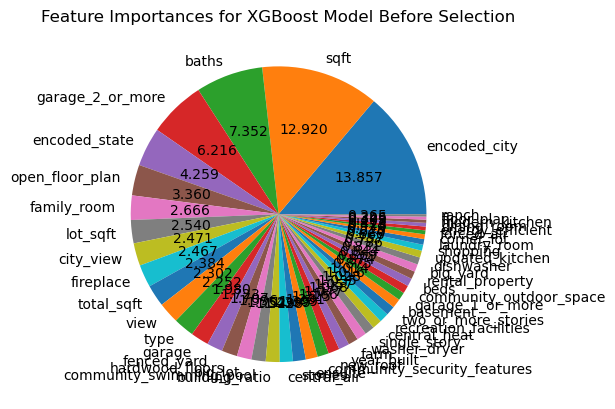

In [28]:
importance_df = pd.DataFrame({
    "Feature": xgb_X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

values = importance_df['Importance']
labels = importance_df['Feature']
plt.pie(values, labels=labels, autopct='%.3f')
plt.title('Feature Importances for XGBoost Model Before Selection')

%matplotlib inline

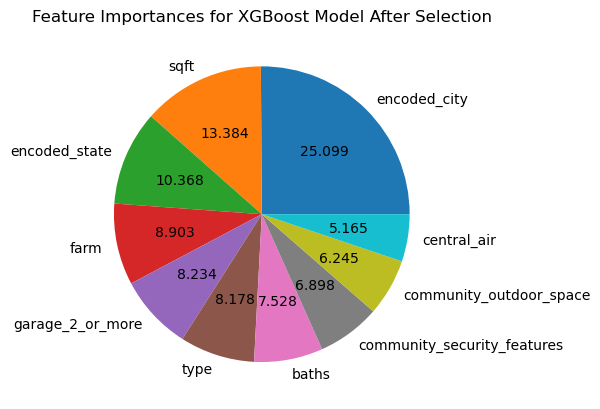

In [29]:
X_trainplt, X_testplt, y_trainplt, y_testplt = train_test_split(selected_X, y, test_size=0.2, random_state=2) # same random state as XGBoost moodel in feature selection 

model_plt = xgb.XGBRegressor()
model_plt.fit(X_trainplt, y_trainplt)

importance_df = pd.DataFrame({
    "Feature": X_trainplt.columns,
    "Importance": model_plt.feature_importances_
}).sort_values(by="Importance", ascending=False)

values = importance_df['Importance']
labels = importance_df['Feature']
plt.pie(values, labels=labels, autopct='%.3f')
plt.title('Feature Importances for XGBoost Model After Selection')

%matplotlib inline